**Data Science Regression Project: Predicting Vehicle Price**




In [0]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import zipfile

import os
from sklearn.model_selection import train_test_split

**Data Load: Load csv tables with vehicle prices into a dataframe**

In [0]:
# from google.colab import files
# uploaded = files.upload()

In [0]:
with zipfile.ZipFile('vehicle.zip') as f:
    f.extractall(".")

In [8]:
!ls

sample_data  vehicle  vehicle.zip


In [0]:
table_lst = os.listdir('vehicle')

In [0]:
def create_df(title):
    df = pd.read_csv(f'vehicle/{title}')
    return df    

In [0]:
def upgrade_model(df):
    df = df.drop(['title', 'price', 'location'], axis=1)
    df['transmission'] = df['transmission'].map({' Ручна / Механіка ': 'manual', ' Автомат ': 'automatic', ' Не вказано ': 'other',
                                ' Типтронік ': 'typtronik', ' Адаптивна ': 'adaptive'})
    df['model'] = df['model'].str.split(',').map(lambda x: x[0].replace('[', '').replace("'", '').replace(']',''))
    df['fuel'] = df['fuel'].map({' Дизель': 'diesel', ' Бензин': 'petrol', ' Газ/Бензин': 'gas'})

    return df

In [0]:
group_to_one = pd.read_csv(f'vehicle/{table_lst[0]}')
for item in range(1,len(table_lst)):
    group_to_one = group_to_one.merge(create_df(table_lst[item]), how='outer')

In [13]:
print(group_to_one.shape)
group_to_one.head()

(22867, 12)


,title,brand,model,year,body,price$,price,car_mileage,fuel,power,location,transmission
0,Skoda Octavia A7,skoda,"['octavia', 'a7']",2013,liftback,12 800,306 816,117,Бензин,1.4,Харків,Автомат
1,Skoda Superb,skoda,['superb'],2014,liftback,14 200,339 380,140,Бензин,1.8,Кривий Ріг,Автомат
2,Nissan Primera,nissan,['primera'],2002,liftback,5 120,122 419,200,Дизель,2.2,Стрий,Ручна / Механіка
3,Skoda Octavia A7,skoda,"['octavia', 'a7']",2013,liftback,13 200,315 744,157,Бензин,1.8,Маріуполь,Ручна / Механіка
4,Skoda Octavia Tour Elegance.*150 к.с*,skoda,"['octavia', 'tour', 'elegance.*150', 'к.с*']",2002,liftback,5 700,136 287,297,Газ/Бензин,1.8,Самбір,Ручна / Механіка


In [14]:
main_df = upgrade_model(group_to_one)
print(main_df.shape)
main_df.head()

(22867, 9)


,brand,model,year,body,price$,car_mileage,fuel,power,transmission
0,skoda,octavia,2013,liftback,12 800,117,petrol,1.4,automatic
1,skoda,superb,2014,liftback,14 200,140,petrol,1.8,automatic
2,nissan,primera,2002,liftback,5 120,200,diesel,2.2,manual
3,skoda,octavia,2013,liftback,13 200,157,petrol,1.8,manual
4,skoda,octavia,2002,liftback,5 700,297,gas,1.8,manual


In [15]:
main_df

,brand,model,year,body,price$,car_mileage,fuel,power,transmission
0,skoda,octavia,2013,liftback,12 800,117,petrol,1.4,automatic
1,skoda,superb,2014,liftback,14 200,140,petrol,1.8,automatic
2,nissan,primera,2002,liftback,5 120,200,diesel,2.2,manual
3,skoda,octavia,2013,liftback,13 200,157,petrol,1.8,manual
4,skoda,octavia,2002,liftback,5 700,297,gas,1.8,manual
...,...,...,...,...,...,...,...,...,...
22862,toyota,sienna,2015,minivan,18 900,78,petrol,3.5,automatic
22863,ford,transit,2010,minivan,6 200,233,diesel,1.8,manual
22864,bmw,216,2017,minivan,25 999,20,diesel,1.5,automatic
22865,volkswagen,t5,2008,minivan,9 800,189,diesel,2.5,manual


**Feature Engineering**

In [16]:
main_df['fuel'].value_counts()

diesel    8705
petrol    8678
gas       3757
Name: fuel, dtype: int64

In [17]:
main_df['brand'].nunique()

93

In [18]:
main_df['body'].nunique()

12

In [19]:
main_df.isnull().sum()

brand              0
model              0
year               0
body               0
price$             0
car_mileage        0
fuel            1727
power           1403
transmission     274
dtype: int64

In [0]:
vehicle_df1 = main_df.copy()
vehicle_df1['transmission'] = vehicle_df1['transmission'].fillna('other')

In [21]:
vehicle_df1.isnull().sum()

brand              0
model              0
year               0
body               0
price$             0
car_mileage        0
fuel            1727
power           1403
transmission       0
dtype: int64

In [0]:
vehicle_df2 = vehicle_df1.copy()
vehicle_df2.loc[vehicle_df2.brand == 'tesla', 'fuel'] = 0
vehicle_df2 = vehicle_df2.dropna()

In [23]:
vehicle_df2.isnull().sum()

brand           0
model           0
year            0
body            0
price$          0
car_mileage     0
fuel            0
power           0
transmission    0
dtype: int64

In [24]:
print(vehicle_df2.shape)
vehicle_df2.head()    

(21140, 9)


,brand,model,year,body,price$,car_mileage,fuel,power,transmission
0,skoda,octavia,2013,liftback,12 800,117,petrol,1.4,automatic
1,skoda,superb,2014,liftback,14 200,140,petrol,1.8,automatic
2,nissan,primera,2002,liftback,5 120,200,diesel,2.2,manual
3,skoda,octavia,2013,liftback,13 200,157,petrol,1.8,manual
4,skoda,octavia,2002,liftback,5 700,297,gas,1.8,manual


In [0]:
brand_count = vehicle_df2['brand'].value_counts(ascending=False) 

In [26]:
brand_count.values.sum()

21140

drop brand which has less 50 pieces

In [27]:
brand_count_less_than_50 = brand_count[(brand_count < 50)]
brand_count_less_than_50

chrysler       49
jaguar         46
газ            40
bentley        32
cadillac       26
smart          25
уаз            21
great          17
daihatsu       17
maserati       15
ravon          12
lincoln        12
buick          11
hummer         10
alfa           10
rover           8
богдан          7
gmc             6
lada            6
byd             6
rolls-royce     5
lancia          5
lifan           4
isuzu           4
samand          4
saab            4
mg              4
dadi            3
луаз            3
iveco           3
москвич         3
ferrari         3
иж              3
jac             3
chana           2
faw             2
changhe         2
zx              2
brilliance      2
sma             1
ds              1
mercury         1
jonway          1
shuanghuan      1
proton          1
maybach         1
lamborghini     1
saipa           1
scion           1
саморобний      1
tata            1
wartburg        1
Name: brand, dtype: int64

In [28]:
len(vehicle_df2.brand.unique())

90

In [29]:
vehicle_df2.brand = vehicle_df2.brand.apply(lambda x: 'other' if x in brand_count_less_than_50 else x)
len(vehicle_df2.brand.unique())

39

In [30]:
vehicle_df2.head()

,brand,model,year,body,price$,car_mileage,fuel,power,transmission
0,skoda,octavia,2013,liftback,12 800,117,petrol,1.4,automatic
1,skoda,superb,2014,liftback,14 200,140,petrol,1.8,automatic
2,nissan,primera,2002,liftback,5 120,200,diesel,2.2,manual
3,skoda,octavia,2013,liftback,13 200,157,petrol,1.8,manual
4,skoda,octavia,2002,liftback,5 700,297,gas,1.8,manual


(array([2919., 2428., 1888., 3662., 1171., 5466., 1829.,  596.,  746.,
         435.]),
 array([ 0. ,  3.8,  7.6, 11.4, 15.2, 19. , 22.8, 26.6, 30.4, 34.2, 38. ]),
 <a list of 10 Patch objects>)

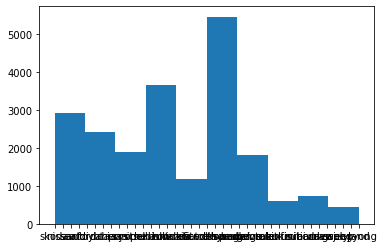

In [31]:
plt.hist(vehicle_df2.brand)

In [32]:
  brand_count[brand_count > 50]

volkswagen       2707
renault          1490
mercedes-benz    1407
skoda            1194
bmw              1190
ford             1117
toyota           1058
opel             1014
hyundai           902
audi              855
nissan            748
ваз               638
chevrolet         581
mitsubishi        577
mazda             556
peugeot           553
kia               537
honda             426
citroen           411
daewoo            300
lexus             294
subaru            234
fiat              223
dacia             188
land              179
volvo             155
заз               150
porsche           147
infiniti          123
seat              122
suzuki            118
jeep              104
geely              79
ssangyong          73
chery              65
mini               61
acura              57
dodge              57
Name: brand, dtype: int64

watch how many model and brand the same we have

In [0]:
model_count = vehicle_df2['model'].value_counts(ascending=False) 

In [34]:
len(model_count)

868

In [35]:
vehicle_df2['combine_brand_model'] = vehicle_df2['brand']+vehicle_df2['model']
vehicle_df2.head()

,brand,model,year,body,price$,car_mileage,fuel,power,transmission,combine_brand_model
0,skoda,octavia,2013,liftback,12 800,117,petrol,1.4,automatic,skodaoctavia
1,skoda,superb,2014,liftback,14 200,140,petrol,1.8,automatic,skodasuperb
2,nissan,primera,2002,liftback,5 120,200,diesel,2.2,manual,nissanprimera
3,skoda,octavia,2013,liftback,13 200,157,petrol,1.8,manual,skodaoctavia
4,skoda,octavia,2002,liftback,5 700,297,gas,1.8,manual,skodaoctavia


(array([849.,  49.,  13.,   5.,   1.,   2.,   0.,   0.,   1.,   1.]),
 array([  1. ,  83.5, 166. , 248.5, 331. , 413.5, 496. , 578.5, 661. ,
        743.5, 826. ]),
 <a list of 10 Patch objects>)

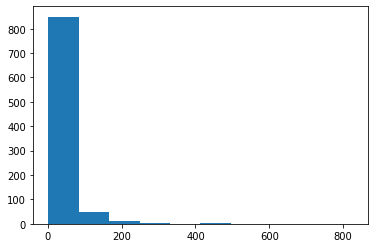

In [36]:
plt.hist(vehicle_df2['combine_brand_model'].value_counts())

In [37]:
vehicle_df2 = vehicle_df2.drop(['combine_brand_model'], axis=1)
vehicle_df2.head(2)

,brand,model,year,body,price$,car_mileage,fuel,power,transmission
0,skoda,octavia,2013,liftback,12 800,117,petrol,1.4,automatic
1,skoda,superb,2014,liftback,14 200,140,petrol,1.8,automatic


**Use One Hot Encoding For Brand**

In [0]:
brand_df = pd.get_dummies(vehicle_df2.brand)

In [39]:
print(brand_df.shape)
brand_df.head()

(21140, 39)


,acura,audi,bmw,chery,chevrolet,citroen,dacia,daewoo,dodge,fiat,ford,geely,honda,hyundai,infiniti,jeep,kia,land,lexus,mazda,mercedes-benz,mini,mitsubishi,nissan,opel,other,peugeot,porsche,renault,seat,skoda,ssangyong,subaru,suzuki,toyota,volkswagen,volvo,ваз,заз
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [40]:
brand_df1 = brand_df.drop(['заз'], axis=1)
print(brand_df1.shape)
brand_df1.head(2)

(21140, 38)


,acura,audi,bmw,chery,chevrolet,citroen,dacia,daewoo,dodge,fiat,ford,geely,honda,hyundai,infiniti,jeep,kia,land,lexus,mazda,mercedes-benz,mini,mitsubishi,nissan,opel,other,peugeot,porsche,renault,seat,skoda,ssangyong,subaru,suzuki,toyota,volkswagen,volvo,ваз
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [0]:
vehicle_df3 = pd.concat([vehicle_df2, brand_df1], axis='columns')

In [42]:
vehicle_df3.head(2)

,brand,model,year,body,price$,car_mileage,fuel,power,transmission,acura,audi,bmw,chery,chevrolet,citroen,dacia,daewoo,dodge,fiat,ford,geely,honda,hyundai,infiniti,jeep,kia,land,lexus,mazda,mercedes-benz,mini,mitsubishi,nissan,opel,other,peugeot,porsche,renault,seat,skoda,ssangyong,subaru,suzuki,toyota,volkswagen,volvo,ваз
0,skoda,octavia,2013,liftback,12 800,117,petrol,1.4,automatic,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,skoda,superb,2014,liftback,14 200,140,petrol,1.8,automatic,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [43]:
vehicle_df4 = vehicle_df3.drop(['brand'], axis=1)
print(vehicle_df4.shape)
vehicle_df4.head(2)

(21140, 46)


,model,year,body,price$,car_mileage,fuel,power,transmission,acura,audi,bmw,chery,chevrolet,citroen,dacia,daewoo,dodge,fiat,ford,geely,honda,hyundai,infiniti,jeep,kia,land,lexus,mazda,mercedes-benz,mini,mitsubishi,nissan,opel,other,peugeot,porsche,renault,seat,skoda,ssangyong,subaru,suzuki,toyota,volkswagen,volvo,ваз
0,octavia,2013,liftback,12 800,117,petrol,1.4,automatic,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,superb,2014,liftback,14 200,140,petrol,1.8,automatic,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


Dummies model

In [44]:
model_df1 = pd.get_dummies(vehicle_df4.model)
print(model_df1.shape)
model_df1.head(2)

(21140, 868)


,/,1,1.3,100,1007,107,1102,110206,110217,11024,11028,1103,110307,1105,11055,110557,110558,1111,1113,1117,1118,1119,114,116,118,120,125,128,1628,170,19,190,2,200,2008,206,207,208,21,210,...,windstar,wraith,wrangler,wrx,x-class,x-trail,x-type,x1,x2,x3,x4,x5,x6,x60,x7,xb,xc60,xc70,xc90,xe,xedos,xf,xj,xjl,xk,xm,xsara,xts,xv,yaris,yeti,ypsilon,yrv,z4,zafira,м,патриот,саморобний,соболь,таврія-нова
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [45]:
model_df2 = model_df1.drop(['таврія-нова'], axis=1)
print(model_df2.shape)
model_df2.head(2)

(21140, 867)


,/,1,1.3,100,1007,107,1102,110206,110217,11024,11028,1103,110307,1105,11055,110557,110558,1111,1113,1117,1118,1119,114,116,118,120,125,128,1628,170,19,190,2,200,2008,206,207,208,21,210,...,wall,windstar,wraith,wrangler,wrx,x-class,x-trail,x-type,x1,x2,x3,x4,x5,x6,x60,x7,xb,xc60,xc70,xc90,xe,xedos,xf,xj,xjl,xk,xm,xsara,xts,xv,yaris,yeti,ypsilon,yrv,z4,zafira,м,патриот,саморобний,соболь
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [46]:
vehicle_df5 = pd.concat([vehicle_df4.drop(['model'], axis=1), model_df2], axis=1)
print(vehicle_df5.shape)
vehicle_df5.head(2)

(21140, 912)


,year,body,price$,car_mileage,fuel,power,transmission,acura,audi,bmw,chery,chevrolet,citroen,dacia,daewoo,dodge,fiat,ford,geely,honda,hyundai,infiniti,jeep,kia,land,lexus,mazda,mercedes-benz,mini,mitsubishi,nissan,opel,other,peugeot,porsche,renault,seat,skoda,ssangyong,subaru,...,wall,windstar,wraith,wrangler,wrx,x-class,x-trail,x-type,x1,x2,x3,x4,x5,x6,x60,x7,xb,xc60,xc70,xc90,xe,xedos,xf,xj,xjl,xk,xm,xsara,xts,xv,yaris,yeti,ypsilon,yrv,z4,zafira,м,патриот,саморобний,соболь
0,2013,liftback,12 800,117,petrol,1.4,automatic,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2014,liftback,14 200,140,petrol,1.8,automatic,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Dummies body

In [47]:
body_df1 = pd.get_dummies(vehicle_df5.body)
print(body_df1.shape)
body_df1.head(2)

(21140, 12)


,SUV/crossover,cabriolet,coupe,hatchback,liftback,limousine,minivan,other,passenger van,pickup,sedan,station wagon
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0


In [48]:
body_df2 = body_df1.drop(['station wagon'], axis=1)
print(body_df2.shape)
body_df2.head(2)

(21140, 11)


,SUV/crossover,cabriolet,coupe,hatchback,liftback,limousine,minivan,other,passenger van,pickup,sedan
0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0


In [49]:
vehicle_df6 = pd.concat([vehicle_df5.drop(['body'], axis=1), body_df2], axis=1)
print(vehicle_df6.shape)
vehicle_df6.head(2)

(21140, 922)


,year,price$,car_mileage,fuel,power,transmission,acura,audi,bmw,chery,chevrolet,citroen,dacia,daewoo,dodge,fiat,ford,geely,honda,hyundai,infiniti,jeep,kia,land,lexus,mazda,mercedes-benz,mini,mitsubishi,nissan,opel,other,peugeot,porsche,renault,seat,skoda,ssangyong,subaru,suzuki,...,x4,x5,x6,x60,x7,xb,xc60,xc70,xc90,xe,xedos,xf,xj,xjl,xk,xm,xsara,xts,xv,yaris,yeti,ypsilon,yrv,z4,zafira,м,патриот,саморобний,соболь,SUV/crossover,cabriolet,coupe,hatchback,liftback,limousine,minivan,other,passenger van,pickup,sedan
0,2013,12 800,117,petrol,1.4,automatic,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,2014,14 200,140,petrol,1.8,automatic,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


Dummies fuel

In [50]:
fuel_df1 = pd.get_dummies(vehicle_df6.fuel)
print(fuel_df1.shape)
fuel_df1.head(2)

(21140, 3)


,diesel,gas,petrol
0,0,0,1
1,0,0,1


In [51]:
fuel_df2 = fuel_df1.drop(['petrol'], axis=1)
print(fuel_df2.shape)
fuel_df2.head(2)

(21140, 2)


,diesel,gas
0,0,0
1,0,0


In [52]:
vehicle_df7 = pd.concat([vehicle_df6.drop(['fuel'], axis=1), fuel_df2], axis=1)
print(vehicle_df7.shape)
vehicle_df7.head(2)

(21140, 923)


,year,price$,car_mileage,power,transmission,acura,audi,bmw,chery,chevrolet,citroen,dacia,daewoo,dodge,fiat,ford,geely,honda,hyundai,infiniti,jeep,kia,land,lexus,mazda,mercedes-benz,mini,mitsubishi,nissan,opel,other,peugeot,porsche,renault,seat,skoda,ssangyong,subaru,suzuki,toyota,...,x6,x60,x7,xb,xc60,xc70,xc90,xe,xedos,xf,xj,xjl,xk,xm,xsara,xts,xv,yaris,yeti,ypsilon,yrv,z4,zafira,м,патриот,саморобний,соболь,SUV/crossover,cabriolet,coupe,hatchback,liftback,limousine,minivan,other,passenger van,pickup,sedan,diesel,gas
0,2013,12 800,117,1.4,automatic,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,2014,14 200,140,1.8,automatic,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


Dummies transmision

In [53]:
transmission_df1 = pd.get_dummies(vehicle_df7.transmission)
print(transmission_df1.shape)
transmission_df1.head(2)

(21140, 5)


,adaptive,automatic,manual,other,typtronik
0,0,1,0,0,0
1,0,1,0,0,0


In [54]:
transmission_df2 = transmission_df1.drop(['typtronik'], axis=1)
print(transmission_df2.shape)
transmission_df2.head(2)

(21140, 4)


,adaptive,automatic,manual,other
0,0,1,0,0
1,0,1,0,0


In [55]:
vehicle_df8 = pd.concat([vehicle_df7.drop(['transmission'], axis=1), transmission_df2], axis=1)
print(vehicle_df8.shape)
vehicle_df8.head(2)

(21140, 926)


,year,price$,car_mileage,power,acura,audi,bmw,chery,chevrolet,citroen,dacia,daewoo,dodge,fiat,ford,geely,honda,hyundai,infiniti,jeep,kia,land,lexus,mazda,mercedes-benz,mini,mitsubishi,nissan,opel,other,peugeot,porsche,renault,seat,skoda,ssangyong,subaru,suzuki,toyota,volkswagen,...,xc60,xc70,xc90,xe,xedos,xf,xj,xjl,xk,xm,xsara,xts,xv,yaris,yeti,ypsilon,yrv,z4,zafira,м,патриот,саморобний,соболь,SUV/crossover,cabriolet,coupe,hatchback,liftback,limousine,minivan,other,passenger van,pickup,sedan,diesel,gas,adaptive,automatic,manual,other
0,2013,12 800,117,1.4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,2014,14 200,140,1.8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [56]:
vehicle_df8['price$'].describe

<bound method NDFrame.describe of 0        12 800
1        14 200
2         5 120
3        13 200
4         5 700
          ...  
22862    18 900
22863     6 200
22864    25 999
22865     9 800
22866     8 200
Name: price$, Length: 21140, dtype: object>

In [0]:
vehicle_df8['price'] = vehicle_df8['price$'].map(lambda x: x.replace(' ', '').replace('договірна', '0')).astype('int32')

In [58]:
print(vehicle_df8.shape)
vehicle_df8.head(2)

(21140, 927)


,year,price$,car_mileage,power,acura,audi,bmw,chery,chevrolet,citroen,dacia,daewoo,dodge,fiat,ford,geely,honda,hyundai,infiniti,jeep,kia,land,lexus,mazda,mercedes-benz,mini,mitsubishi,nissan,opel,other,peugeot,porsche,renault,seat,skoda,ssangyong,subaru,suzuki,toyota,volkswagen,...,xc70,xc90,xe,xedos,xf,xj,xjl,xk,xm,xsara,xts,xv,yaris,yeti,ypsilon,yrv,z4,zafira,м,патриот,саморобний,соболь,SUV/crossover,cabriolet,coupe,hatchback,liftback,limousine,minivan,other,passenger van,pickup,sedan,diesel,gas,adaptive,automatic,manual,other,price
0,2013,12 800,117,1.4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,12800
1,2014,14 200,140,1.8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,14200


In [74]:
vehicle_df9 = vehicle_df8.drop(['price$'], axis=1)
print(vehicle_df9.shape)
vehicle_df9.head(2)

(21140, 926)


,year,car_mileage,power,acura,audi,bmw,chery,chevrolet,citroen,dacia,daewoo,dodge,fiat,ford,geely,honda,hyundai,infiniti,jeep,kia,land,lexus,mazda,mercedes-benz,mini,mitsubishi,nissan,opel,other,peugeot,porsche,renault,seat,skoda,ssangyong,subaru,suzuki,toyota,volkswagen,volvo,...,xc70,xc90,xe,xedos,xf,xj,xjl,xk,xm,xsara,xts,xv,yaris,yeti,ypsilon,yrv,z4,zafira,м,патриот,саморобний,соболь,SUV/crossover,cabriolet,coupe,hatchback,liftback,limousine,minivan,other,passenger van,pickup,sedan,diesel,gas,adaptive,automatic,manual,other,price
0,2013,117,1.4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,12800
1,2014,140,1.8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,14200


Split our data to x and y datasets

In [60]:
X = vehicle_df9.drop(['price'], axis=1)
X.shape

(21140, 925)

In [61]:
y = vehicle_df9['price']
y.shape

(21140,)

Split to train and test datasets

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [63]:
print(f"X_train shape is {X_train.shape} and y_train shape is {y_train.shape}")
print(f"X_test shape is {X_test.shape} and y_test shape is {y_test.shape}")

X_train shape is (16912, 925) and y_train shape is (16912,)
X_test shape is (4228, 925) and y_test shape is (4228,)


**Let's build model, and find the best solution**

In [0]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

**Find best model using GridSearchCV**

In [65]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            },
        },
        'random_forest': { 
            'model' : RandomForestRegressor(),
            'params': {
                'n_estimators': [i for i in range(10, 100, 20)],
                'max_depth' : [5,8, None]
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X_train,y_train)

,model,best_score,best_params
0,linear_regression,-3.794701e+11,{'normalize': False}
1,lasso,6.266220e-01,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,7.835197e-01,"{'criterion': 'mse', 'splitter': 'random'}"
3,random_forest,8.792944e-01,"{'max_depth': None, 'n_estimators': 70}"


The best result is RandomForestRegressor

In [0]:
model = RandomForestRegressor(n_estimators=50)

In [67]:
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [68]:
model.score(X_test, y_test)

0.9093761165566083

Let's make some prediction.

In [0]:
def predict_price(year,car_mileage,power,brand,model_,body,fuel,transmission):    
    try:
      brand_index = np.where(X.columns==brand)[0][0]
    except IndexError :
      brand_index = 0
    try:
      model_index = np.where(X.columns==model_)[0][0]
    except IndexError :
      model_index = 0
    try:
      body_index = np.where(X.columns==body)[0][0]
    except IndexError :
      body_index = 0
    try:
      fuel_index = np.where(X.columns == fuel)[0][0]
    except IndexError :
      fuel_index = 0
    try:
      fuel_index = np.where(X.columns == fuel)[0][0]
    except IndexError :
      fuel_index = 0
    try:
      transmission_index = np.where(X.columns == transmission)[0][0]
    except IndexError :
      transmission_index = 0
    

    x = np.zeros(len(X.columns), dtype='float32')
    x[0] = year
    x[1] = car_mileage
    x[2] = power
    if brand_index > 0:
        x[brand_index] = 1
    if model_index > 0:
        x[model_index] = 1
    if body_index > 0:
        x[body_index] = 1
    if fuel_index > 0:
        x[fuel_index] = 1
    if transmission_index > 0:
        x[transmission_index] = 1
    pred = model.predict([x])[0]
    return pred

In [135]:
predict_price(2002, 297, 1.8, 'skoda', 'octavia', 'liftback', 'gas', 'manual')

5819.94

In [133]:
vehicle_df2.head(5)

,brand,model,year,body,price$,car_mileage,fuel,power,transmission
0,skoda,octavia,2013,liftback,12 800,117,petrol,1.4,automatic
1,skoda,superb,2014,liftback,14 200,140,petrol,1.8,automatic
2,nissan,primera,2002,liftback,5 120,200,diesel,2.2,manual
3,skoda,octavia,2013,liftback,13 200,157,petrol,1.8,manual
4,skoda,octavia,2002,liftback,5 700,297,gas,1.8,manual


**Export the tested model to a pickle file**

In [0]:
import pickle
with open('vehicle_prices_model.pickle','wb') as f:
    pickle.dump(model,f)

In [0]:
files.download('vehicle_prices_model.pickle')

**Export brand and column information to a file that will be useful later**

In [0]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))

In [0]:
files.download("columns.json")